In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from finvizfinance.screener.overview import Overview
import alpaca_trade_api as tradeapi
import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import arch
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



Bad key "text.kerning_factor" on line 4 in
/Users/freddieeisa/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Read your api key environment variable
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv("news_api")
print(api_key)

b5be180355fe47518e12244a82ffb1aa


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["news_api"])

In [5]:
foverview = Overview()

filters_dict = {
    'Performance':'Today Up',
    'Current Volume':"Over 10M",
    'Change': 'Up 5%',
    'Country': 'USA'
}
foverview.set_filter(filters_dict=filters_dict)

tickers = foverview.ScreenerView()
#tickers.sort_values(by='Volume', inplace=True, ascending=False)
tickers.set_index('Ticker', inplace=True )
tickers.head(100)

,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
Ticker,,,,,,,,,
ACIC,Atlas Crest Investment Corp.,Financial,Shell Companies,USA,8.570000e+08,None,17.14,0.0646,15529439.0
AVGR,"Avinger, Inc.",Healthcare,Medical Devices,USA,2.036800e+08,None,2.10,0.2426,122519731.0
CEI,"Camber Energy, Inc.",Energy,Oil & Gas E&P,USA,5.611000e+07,None,2.23,0.0985,60393616.0
CLSK,"CleanSpark, Inc.",Technology,Software - Infrastructure,USA,9.467800e+08,None,38.10,0.2587,11558723.0
FE,FirstEnergy Corp.,Utilities,Utilities - Diversified,USA,1.851000e+10,30.36,34.25,0.0720,18822326.0
GSAH,GS Acquisition Holdings Corp II,Financial,Shell Companies,USA,1.310000e+09,None,13.99,0.1237,12688881.0
HSTO,Histogen Inc.,Healthcare,Biotechnology,USA,4.795000e+07,None,1.69,0.1342,21176757.0
JAGX,"Jaguar Health, Inc.",Healthcare,Biotechnology,USA,3.782200e+08,None,3.16,0.1449,66497667.0
KHC,The Kraft Heinz Company,Consumer Defensive,Packaged Foods,USA,4.784000e+10,137.18,38.96,0.0524,22432174.0


In [6]:
def get_sentiment(company):
    stock_headlines = ( newsapi.get_everything(
    q=company,
    language='en',
    sort_by='relevancy'))

    sentiments = []

    for articles in stock_headlines['articles']:
        try:
            text = articles['content']
            results = analyzer.polarity_scores(text)
            compound = results['compound']
            pos = results['pos']
            neu = results['neu']
            neg = results['neg'] 

            #put data into sentiments
            sentiments.append({
                'text':text,
                'Compound':compound,
                'Positive':pos,
                'Negative':neg,
                'Neutral':neu})

        except AttributeError:
            pass
    fininal_sentiments = pd.DataFrame(sentiments)
    if not fininal_sentiments.empty:
        return(fininal_sentiments["Positive"].mean())
    else:
        return(0)

In [7]:
ticker_sentiment = [] 
for ticker in tickers.index: 
    sentiment = get_sentiment(tickers['Company'][ticker])
    print(sentiment)
    if float(sentiment) >= 0.1:
        ticker_sentiment.append(ticker)
        print(f"{ticker} meets our sentiment requirement")
    else:
        print(f"{ticker} does not meet our sentiment requirement")

0.12768421052631576
ACIC meets our sentiment requirement
0.04825
AVGR does not meet our sentiment requirement
0.17433333333333334
CEI meets our sentiment requirement
0.08385000000000001
CLSK does not meet our sentiment requirement
0.07300000000000001
FE does not meet our sentiment requirement
0.138
GSAH meets our sentiment requirement
0.07666666666666666
HSTO does not meet our sentiment requirement
0.0698235294117647
JAGX does not meet our sentiment requirement
0.0825
KHC does not meet our sentiment requirement
0.019333333333333334
MICT does not meet our sentiment requirement
0.137
MOTS meets our sentiment requirement
0.06466666666666666
ONTX does not meet our sentiment requirement
0.043625
QUIK does not meet our sentiment requirement
0.07877777777777778
RIGL does not meet our sentiment requirement
0.07233333333333333
SABR does not meet our sentiment requirement
0.111
SFTW meets our sentiment requirement
0.05846153846153846
TTNP does not meet our sentiment requirement
0.0997
USWS does 

In [8]:
### Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [9]:
#Set time frame for reporting stocks
today = datetime.date.today()
tomorrow = today + datetime.timedelta(days = 2) 
start_time = tomorrow.strftime("%b %d %Y") + " 10:00AM"
next_day = today + datetime.timedelta(days = 1) 
end_time = next_day.strftime("%b %d %Y") + " 1:00PM"

date_from = datetime.datetime.strptime(
    start_time, '%b %d %Y %I:%M%p')
date_to = datetime.datetime.strptime(
    end_time, '%b %d %Y %I:%M%p')

In [10]:
# Set timeframe to '1D'
timeframe = "1D"

#Set timeframe for last 2 years
start_date = pd.Timestamp("2018-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp(next_day, tz="America/New_York").isoformat()

#Get ticker data
df_ticker = api.get_barset(
    ticker_sentiment,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.dropna()
df_ticker.tail()


ACIC                                    CEI        \
                            open   high    low  close      volume  open  high   
time                                                                            
2021-02-11 00:00:00-05:00  14.50  14.83  13.56  13.99  12263944.0  2.10  2.10   
2021-02-12 00:00:00-05:00  13.85  13.85  13.00  13.50   6343627.0  1.83  1.97   
2021-02-16 00:00:00-05:00  14.87  14.87  13.61  14.11   7284269.0  1.96  2.37   
2021-02-17 00:00:00-05:00  16.43  16.50  15.17  16.15  12807833.0  2.17  2.19   
2021-02-18 00:00:00-05:00  16.42  18.60  16.16  17.25  14976667.0  2.80  3.10   

                                                       ...  MOTS              \
                              low   close      volume  ...  open  high   low   
time                                                   ...                     
2021-02-11 00:00:00-05:00  1.8150  1.8383   7222708.0  ...  1.90  1.92  1.70   
2021-02-12 00:00:00-05:00  1.7200  1.8300   6582052.0  ...  1.74  1.78  1.69   
2021-02-16 00:00:00-05:00  1.9300  2.1673  15470275.0  ...  1.73  1.84  1.70   
2021-02-17 00:00:00-05:00  1.9246  2.0300   4759340.0  ...  1.84  1.91  1.73   
2021-02-18 00:00:00-05:00  2.1700  2.2100  54329481.0  ...  2.10  2.74  1.91   

                                              SFTW                       \
                          close      volume   open   high    low  close   
time                                                                      
2021-02-11 00:00:00-05:00  1.78   4022038.0  10.72  10.87  10.61  10.65   
2021-02-12 00:00:00-05:00  1.71   1911807.0  10.67  10.74  10.65  10.74   
2021-02-16 00:00:00-05:00  1.73   4304660.0  10.76  11.07  10.72  11.00   
2021-02-17 00:00:00-05:00  1.77   3205690.0  11.00  11.19  10.88  11.00   
2021-02-18 00:00:00-05:00  2.46  42123840.0  13.82  14.75  13.33  14.17   

                                       
                               volume  
time                                   
2021-02-11 00:00:00-05:00    135683.0  
2021-02-12 00:00:00-05:00     27623.0  
2021-02-16 00:00:00-05:00     79158.0  
2021-02-17 00:00:00-05:00    135457.0  
2021-02-18 00:00:00-05:00  16400255.0  

[5 rows x 25 columns]

In [11]:
df_closing_prices = pd.DataFrame()
for ticker in ticker_sentiment: 
    df_closing_prices[ticker] = df_ticker[ticker]["close"]


In [12]:
df_closing_prices.tail()

,ACIC,CEI,GSAH,MOTS,SFTW
time,,,,,
2021-02-11 00:00:00-05:00,13.99,1.8383,12.04,1.78,10.65
2021-02-12 00:00:00-05:00,13.50,1.8300,12.07,1.71,10.74
2021-02-16 00:00:00-05:00,14.11,2.1673,12.25,1.73,11.00
2021-02-17 00:00:00-05:00,16.15,2.0300,12.44,1.77,11.00
2021-02-18 00:00:00-05:00,17.25,2.2100,13.98,2.46,14.17


In [19]:
def hpfilter(ticker):
    ts_noise, ts_trend = sm.tsa.filters.hpfilter(df_ticker[ticker][['close']])

    #create different dataframes for each composition
    ticker_decomp = df_ticker[ticker][['close']].copy()
    ticker_decomp['noise'] = ts_noise
    ticker_decomp['trend'] = ts_trend
    return ts_noise.plot(title='Noise')

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


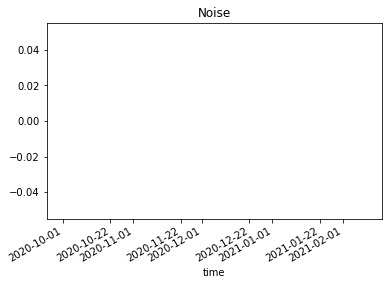

In [20]:
for ticker in ticker_sentiment: 
    print(hpfilter((ticker)))

In [23]:
from statsmodels.tsa.arima_model import ARIMA
price_forcasting = pd.DataFrame()
for ticker in df_closing_prices: 
    model = ARIMA(df_closing_prices[ticker], order=(1,1,1))
    results = model.fit()
    #for i in results.forecast(steps=15)[0]:
    #  print(i)
    #      print(i, ticker)
        
    #print(results.summary())
price_forcasting.head()


model = ARIMA(df_ticker.iloc[:, [0]], order=(1,1,1))

#Fit
results = model.fit()

#summary
results.summary()

MissingDataError: exog contains inf or nans